In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [29]:
# Importing Data
dataset = pd.read_csv('data/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

# Feture Scaling
sc = MinMaxScaler(feature_range = (0,1)) # normailze data set from 0,1 for every col
X = sc.fit_transform(X)

In [30]:
# Train SOM
from minisom import MiniSom

# x,y = dim, input_len = num_of_fetures_in_dataset, sigma = different_radiuses_in_the_grid, 
# learning_rate = how much the weights are updated after each iteration the higher the variable is the faster theres convergence
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

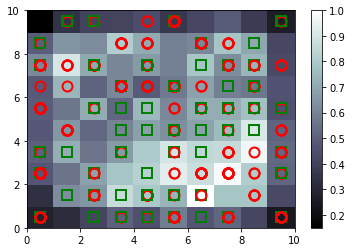

In [36]:
# Visualizing Results
from pylab import bone, pcolor, colorbar, plot, show
# init window
bone()

# input Transpose of som outliers are the white areas
pcolor(som.distance_map().T)

colorbar()

# red circles - customers who didnt get approval
# green squares - customers who got approval
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [37]:
# Finding Frauds

mappings = som.win_map(X)
print(len(mappings))
#concatenating 
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

75
Fraud Customer IDs
15777994
15680643
15692137
15668830
15796569
15712877
15691150
15807546
15773869
15796111
15809800
15676909
15750055
15647898
15679801
15732943
15770255
15773789
15794868
15705506
